# Exercise: Linear Regression
* read in dataset from __`data/skincancer.csv`__
* the dataset contains skin cancer mortality rates from 48 states and Washington D.C.
* the __`Lat`__ column is the latitude at the center of the state
* the __`Mort`__ column is mortality in deaths per 10 million

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
# Hint: the read_csv function expects comma-separated files
# You can look up the docs on read_csv by typing pd.read_csv? and then hitting Run
pd.read_csv?

In [4]:
skin = pd.read_csv('data/skincancer.csv', sep=None, engine='python')

# Examine the data

In [5]:
skin.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


In [6]:
skin.describe()

,Lat,Mort,Ocean,Long
count,49.000000,49.000000,49.000000,49.000000
mean,39.532653,152.877551,0.448980,90.936735
std,4.610874,33.428177,0.502545,14.866485
min,28.000000,86.000000,0.000000,69.000000
25%,36.000000,128.000000,0.000000,78.500000
50%,39.500000,147.000000,0.000000,89.500000
75%,43.000000,178.000000,1.000000,100.000000
max,47.500000,229.000000,1.000000,121.000000


# Visualize the data by creating a scatterplot of latitude vs. mortality

Text(0, 0.5, 'Mortality')

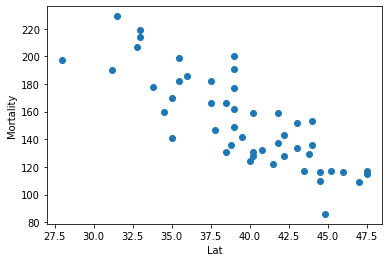

In [7]:
plt.scatter(skin.Lat, skin.Mort)
plt.xlabel('Lat')
plt.ylabel('Mortality')

# Using the demo as starting point, create a linear regression of latitude vs. mortality

In [8]:
lat = skin['Lat'].values #the values attribute holds the data as a numpy array
X_data = lat[:,np.newaxis]
lm = LinearRegression().fit(X=X_data, y=skin.Mort)

## Plot the regression line over the scatterplot of the data

Text(0, 0.5, 'Mortality')

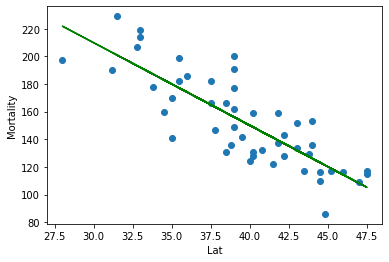

In [9]:
pred = lm.predict(X=X_data)
plt.plot(X_data, pred, color='green')
# let's add the scatter from before as well
plt.scatter(skin.Lat, skin.Mort)
plt.xlabel('Lat')
plt.ylabel('Mortality')

# What are the values of the coefficient and intercept?

In [10]:
print(f'y = {lm.coef_[0]:.2f}x + {lm.intercept_:.2f}')

y = -5.98x + 389.19


# Can you explain the relationship?

# More Linear Regression
* read in dataset from __`data/cars.csv`__
* the dataset contains miles-per-gallon values for various cars


In [12]:
import seaborn as sns

In [13]:
cars = pd.read_csv('data/cars.csv')
cars.head()

,cylinders,displacement,horsepower,weight,accel,year,model,mpg
0,8.0,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,15.0
1,8.0,350.0,165.0,3693.0,11.5,70,buick skylark 320,15.0
2,8.0,318.0,150.0,3436.0,11.0,70,plymouth satellite,18.0
3,8.0,304.0,150.0,3433.0,12.0,70,amc rebel sst,16.0
4,8.0,302.0,140.0,3449.0,10.5,70,ford torino,17.0


# Visualize the data by creating scatterplots of displacement, horsepower, and weight vs. mpg

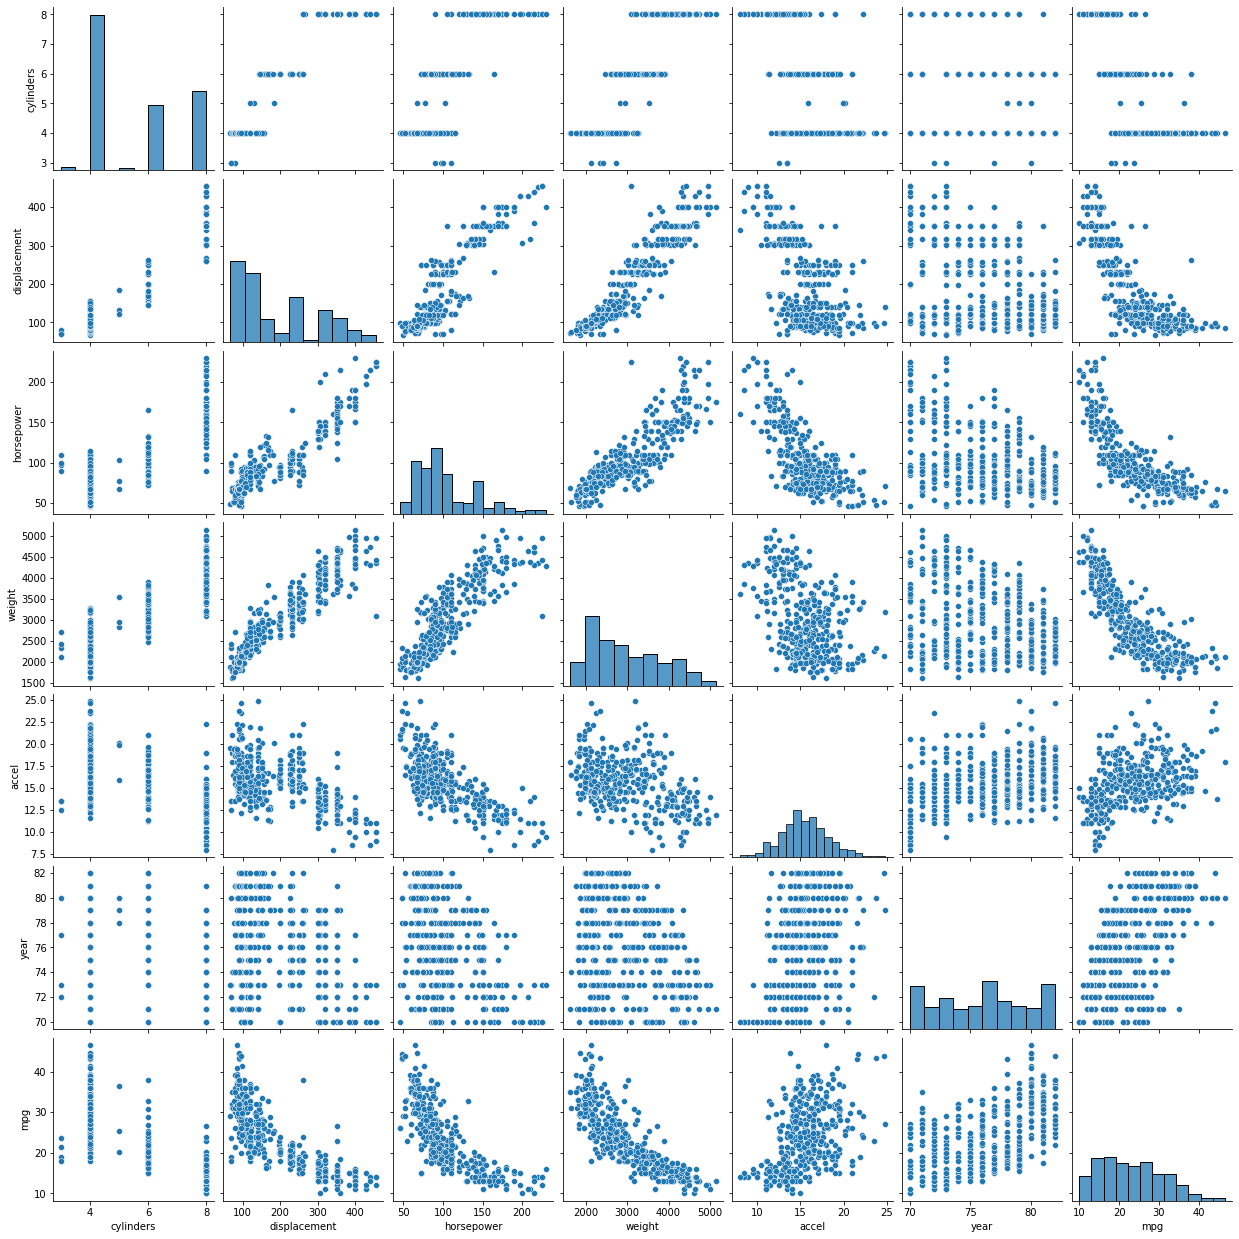

In [14]:
sns.pairplot(cars)

# Create several linear regressions to see how mpg is affected
* displacement vs. mpg
* horsepower vs. mpg
* weight vs. mpg

In [13]:
# Create several linear regressions to see how mpg is affected
# displacement vs. mpg
lm1 = LinearRegression().fit(X=cars.displacement.values[:, np.newaxis], y=cars.mpg)
# horsepower vs. mpg
lm2 = LinearRegression().fit(X=cars.horsepower.values[:, np.newaxis], y=cars.mpg)
# weight vs. mpg
lm3 = LinearRegression().fit(X=cars.weight.values[:, np.newaxis], y=cars.mpg)

In [14]:
# what is the training error for each?
print(f'Training error for displacement: {lm1.score(X=cars.displacement.values[:, np.newaxis], y=cars.mpg):.4f}')
print(f'Training error for horsepower: {lm2.score(X=cars.horsepower.values[:, np.newaxis], y=cars.mpg):.4f}')
print(f'Training error for weight: {lm3.score(X=cars.weight.values[:, np.newaxis], y=cars.mpg):.4f}')

Training error for displacement: 0.6483
Training error for horsepower: 0.6024
Training error for weight: 0.6898


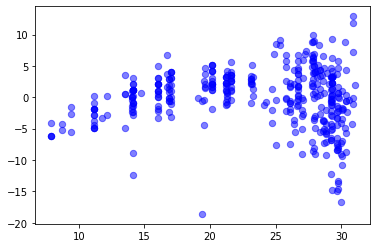

In [15]:
# plot the residuals
plt.scatter(lm1.predict(cars.displacement.values[:, np.newaxis]), lm1.predict(cars.displacement.values[:, np.newaxis]) - cars.mpg, c='b', s=40, alpha=0.5)